In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import os
import glob
from time import time

In [3]:
dataset = pd.read_csv(r'/content/drive/MyDrive/NBaIotDS/MultiDS/MultiDSShuffled.csv') 

In [4]:
dataset

,Unnamed: 0.1,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,177744.0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1,1781014.0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
2,909866.0,175.643631,74.057432,1.375073,287.358760,74.055352,1.325384,846.720663,74.050416,4.119962,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
3,1291145.0,39.123435,74.231317,24.717050,69.403538,74.549626,295.195439,200.741796,78.166564,3303.551321,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
4,NaN,211.427551,72.721415,16.265405,337.713905,72.058241,23.414194,857.618729,71.299322,30.515834,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667791,1855510.0,193.982145,74.733088,186.087555,308.415003,74.776763,196.221110,853.318402,74.604000,219.551339,...,0.000000,0.000000,1.676820,74.00000,0.000000,95.268043,0.000000,0.000000,0.000000,1
1667792,510593.0,100.508137,97.027982,3007.381584,120.367228,97.922939,3224.024617,146.219544,98.744738,3422.757910,...,4.941507,0.057906,92.922723,84.23699,1.985909,120.883916,1839.882017,5.208696,0.061147,0
1667793,1113069.0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1667794,NaN,137.269968,60.000000,0.000001,184.187427,60.000029,0.000360,328.319083,60.116098,55.090013,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,2


In [5]:
dataset.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [6]:
dataset

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
2,175.643631,74.057432,1.375073,287.358760,74.055352,1.325384,846.720663,74.050416,4.119962,7416.605573,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
3,39.123435,74.231317,24.717050,69.403538,74.549626,295.195439,200.741796,78.166564,3303.551321,958.678805,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
4,211.427551,72.721415,16.265405,337.713905,72.058241,23.414194,857.618729,71.299322,30.515834,7262.625234,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667791,193.982145,74.733088,186.087555,308.415003,74.776763,196.221110,853.318402,74.604000,219.551339,7669.768178,...,0.000000,0.000000,1.676820,74.00000,0.000000,95.268043,0.000000,0.000000,0.000000,1
1667792,100.508137,97.027982,3007.381584,120.367228,97.922939,3224.024617,146.219544,98.744738,3422.757910,163.020105,...,4.941507,0.057906,92.922723,84.23699,1.985909,120.883916,1839.882017,5.208696,0.061147,0
1667793,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1667794,137.269968,60.000000,0.000001,184.187427,60.000029,0.000360,328.319083,60.116098,55.090013,2922.456156,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,2


In [7]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000
2,175.643631,74.057432,1.375073,287.358760,74.055352,1.325384,846.720663,74.050416,4.119962,7416.605573,...,0.000000e+00,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000
3,39.123435,74.231317,24.717050,69.403538,74.549626,295.195439,200.741796,78.166564,3303.551321,958.678805,...,0.000000e+00,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000
4,211.427551,72.721415,16.265405,337.713905,72.058241,23.414194,857.618729,71.299322,30.515834,7262.625234,...,0.000000e+00,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667791,193.982145,74.733088,186.087555,308.415003,74.776763,196.221110,853.318402,74.604000,219.551339,7669.768178,...,9.094947e-13,0.000000,0.000000,1.676820,74.00000,0.000000,95.268043,0.000000,0.000000,0.000000
1667792,100.508137,97.027982,3007.381584,120.367228,97.922939,3224.024617,146.219544,98.744738,3422.757910,163.020105,...,1.847392e+03,4.941507,0.057906,92.922723,84.23699,1.985909,120.883916,1839.882017,5.208696,0.061147
1667793,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000
1667794,137.269968,60.000000,0.000001,184.187427,60.000029,0.000360,328.319083,60.116098,55.090013,2922.456156,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000


In [ ]:
XGB_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
t0= time()
XGB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = XGB_model.predict(X_test)
print(time()- t1)

2157.2600071430206
2.165982246398926


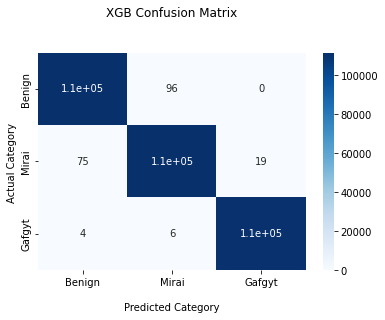

In [ ]:
cf_matrix_XGB = confusion_matrix(y_test, y_pred)
# XGB plot
ax = sns.heatmap(cf_matrix_XGB, annot=True, cmap='Blues')

ax.set_title('XGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
XGB_Accuracy = accuracy_score(y_test, y_pred)
print('XGB Performance Evaluation Results:')
XGB_Precision = precision_score(y_test, y_pred, average= None)
XGB_F1 = f1_score (y_test, y_pred, average= None)
XGB_Recall = recall_score(y_test, y_pred, average= None)
print('(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1)')
XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1

XGB Performance Evaluation Results:
(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1)


(0.9994004077227485,
 array([0.9992894 , 0.99908548, 0.9998286 ]),
 array([0.99913662, 0.99915715, 0.99990978]),
 array([0.99921301, 0.99912131, 0.99986919]))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier(random_state=0 , n_estimators= 100, learning_rate=0.1)
t0= time()
Ada_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = Ada_model.predict(X_test)
print(time()- t1)

1645.2927696704865
9.548318862915039


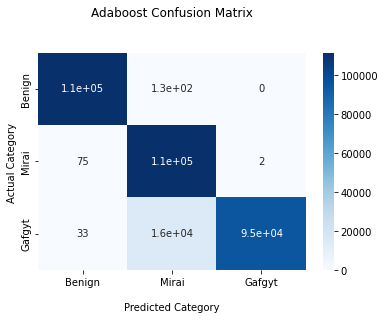

In [ ]:
cf_matrix_ADA = confusion_matrix(y_test, y_pred)
# Adaboost plot
ax = sns.heatmap(cf_matrix_ADA, annot=True, cmap='Blues')

ax.set_title('Adaboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
ADA_Accuracy = accuracy_score(y_test, y_pred)
print('Adaboost Performance Evaluation Results:')
ADA_Precision = precision_score(y_test, y_pred, average = None)
ADA_F1 = f1_score (y_test, y_pred, average = None)
ADA_Recall = recall_score(y_test, y_pred, average = None)
print('(ADA_Accuracy, ADA_Precision,  ADA_Recall, ADA_F1)')
ADA_Accuracy, ADA_Precision, ADA_Recall, ADA_F1 

Adaboost Performance Evaluation Results:
(ADA_Accuracy, ADA_Precision,  ADA_Recall, ADA_F1)


(0.9525662549466363,
 array([0.99902851, 0.8764401 , 0.999979  ]),
 array([0.99883084, 0.99930958, 0.85912507]),
 array([0.99892966, 0.93385061, 0.92421618]))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state = 0, n_estimators=100)
t0= time()
GB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = GB_model.predict(X_test)
print(time()- t1)

10125.00405716896
3.4733643531799316


In [ ]:
from sklearn.metrics import accuracy_score
GB_Accuracy = accuracy_score(y_test, y_pred)
print('Gradient Boosting Classifier Performance Evaluation Results:')
GB_F1 = f1_score (y_test, y_pred, average = None)
GB_Recall = recall_score(y_test, y_pred, average = None)
GB_Precision = precision_score(y_test, y_pred, average = None)
print('(GB_Accuracy, GB_Precision, GB_Recall, GB_F1')
GB_Accuracy, GB_Precision, GB_Recall, GB_F1

Gradient Boosting Classifier Performance Evaluation Results:
(GB_Accuracy, GB_Precision, GB_Recall, GB_F1


(0.9998890754287085,
 array([0.99973025, 0.99993722, 1.        ]),
 array([0.99994604, 0.99973997, 0.99998196]),
 array([0.99983813, 0.99983859, 0.99999098]))

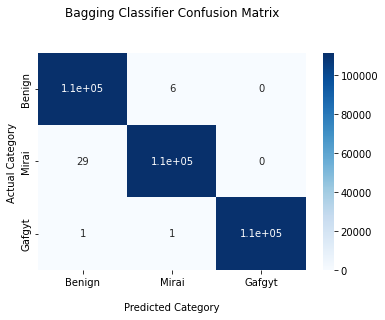

In [ ]:
cf_matrix_GB= confusion_matrix(y_test, y_pred)
# Bagging Classifier plot
ax = sns.heatmap(cf_matrix_GB, annot=True, cmap='Blues')

ax.set_title('Gradient Boosting Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [9]:
from lightgbm import LGBMClassifier
LGB_model = LGBMClassifier(random_state = 0)
t0= time()
LGB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = LGB_model.predict(X_test)
print(time()- t1)

170.9489665031433
2.310431957244873


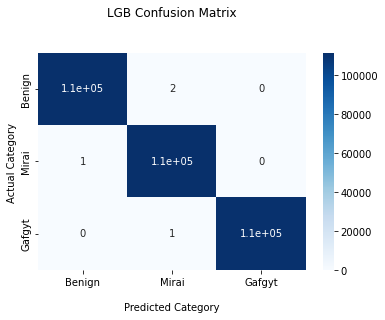

In [12]:
cf_matrix_LGB = confusion_matrix(y_test, y_pred)
# LGB plot
ax = sns.heatmap(cf_matrix_LGB, annot=True, cmap='Blues')

ax.set_title('LGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
LGB_Accuracy = accuracy_score(y_test, y_pred)
print('Light Gradient Boosting Classifier Performance Evaluation Results:')
LGB_F1 = f1_score (y_test, y_pred, average = None)
LGB_Recall = recall_score(y_test, y_pred, average = None)
LGB_Precision = precision_score(y_test, y_pred, average = None)
print('(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1')
LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1

Light Gradient Boosting Classifier Performance Evaluation Results:
(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1


(0.999988008154455,
 array([0.99999101, 0.9999731 , 1.        ]),
 array([0.99998201, 0.99999103, 0.99999098]),
 array([0.99998651, 0.99998207, 0.99999549]))

In [9]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGB_model = HistGradientBoostingClassifier(random_state = 0)
t0= time()
HGB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = HGB_model.predict(X_test)
print(time()- t1)

166.53283619880676
6.278822183609009


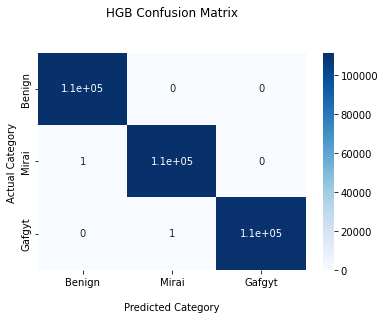

In [10]:
cf_matrix_HGB = confusion_matrix(y_test, y_pred)
# HGB plot
ax = sns.heatmap(cf_matrix_HGB, annot=True, cmap='Blues')

ax.set_title('HGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
HGB_Accuracy = accuracy_score(y_test, y_pred)
print('Histo Gradient Boosting Classifier Performance Evaluation Results:')
HGB_F1 = f1_score (y_test, y_pred, average = None)
HGB_Recall = recall_score(y_test, y_pred, average = None)
HGB_Precision = precision_score(y_test, y_pred, average = None)
print('(HGB_Accuracy, HGB_Precision, HGB_Recall, HGB_F1')
HGB_Accuracy, HGB_Precision, HGB_Recall, HGB_F1

Histo Gradient Boosting Classifier Performance Evaluation Results:
(HGB_Accuracy, HGB_Precision, HGB_Recall, HGB_F1


(0.9999940040772275,
 array([0.99999101, 0.99999103, 1.        ]),
 array([1.        , 0.99999103, 0.99999098]),
 array([0.9999955 , 0.99999103, 0.99999549]))

In [14]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 17.5 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostClassifier
CAB_model = CatBoostClassifier(random_state = 0)
t0= time()
CAB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = CAB_model.predict(X_test)
print(time()- t1)

Learning rate set to 0.114212
0:	learn: 0.8863963	total: 3.89s	remaining: 1h 4m 45s
1:	learn: 0.7351722	total: 8.44s	remaining: 1h 10m 10s
2:	learn: 0.6195879	total: 14s	remaining: 1h 17m 44s
3:	learn: 0.5283769	total: 19.9s	remaining: 1h 22m 25s
4:	learn: 0.4544360	total: 26.5s	remaining: 1h 27m 47s
5:	learn: 0.3936061	total: 30.5s	remaining: 1h 24m 17s
6:	learn: 0.3426117	total: 33.3s	remaining: 1h 18m 45s
7:	learn: 0.2994719	total: 35.4s	remaining: 1h 13m 4s
8:	learn: 0.2626357	total: 37.8s	remaining: 1h 9m 22s
9:	learn: 0.2312547	total: 39.9s	remaining: 1h 5m 50s
10:	learn: 0.2041111	total: 42s	remaining: 1h 2m 52s
11:	learn: 0.1803712	total: 44s	remaining: 1h 20s
12:	learn: 0.1597645	total: 46s	remaining: 58m 10s
13:	learn: 0.1417930	total: 48.4s	remaining: 56m 47s
14:	learn: 0.1260859	total: 50.4s	remaining: 55m 12s
15:	learn: 0.1122817	total: 52.5s	remaining: 53m 47s
16:	learn: 0.1002436	total: 54.6s	remaining: 52m 36s
17:	learn: 0.0895033	total: 56.6s	remaining: 51m 30s
18:	lea

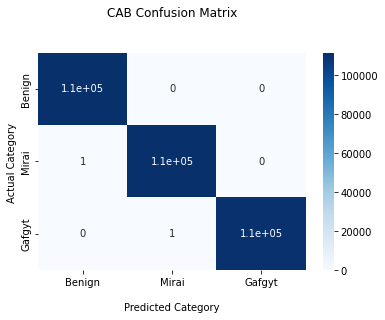

In [16]:
cf_matrix_CAB = confusion_matrix(y_test, y_pred)
# CATB plot
ax = sns.heatmap(cf_matrix_CAB, annot=True, cmap='Blues')

ax.set_title('CAB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
CAB_Accuracy = accuracy_score(y_test, y_pred)
print('Cat Boosting Classifier Performance Evaluation Results:')
CAB_F1 = f1_score (y_test, y_pred, average = None)
CAB_Recall = recall_score(y_test, y_pred, average = None)
CAB_Precision = precision_score(y_test, y_pred, average = None)
print('(CAB_Accuracy, CAB_Precision, CAB_Recall, CAB_F1')
CAB_Accuracy, CAB_Precision, CAB_Recall, CAB_F1

Cat Boosting Classifier Performance Evaluation Results:
(CAB_Accuracy, CAB_Precision, CAB_Recall, CAB_F1


(0.9999940040772275,
 array([0.99999101, 0.99999103, 1.        ]),
 array([1.        , 0.99999103, 0.99999098]),
 array([0.9999955 , 0.99999103, 0.99999549]))